<a href="https://colab.research.google.com/github/DaniChinwendu/EWC2-ANN-MODEL/blob/main/EWC_2_DPRA%2Ch_CLAT%2CARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
from google.colab import files
uploaded=files.upload()
import pandas as pd
import numpy as np
df=pd.read_csv(io.BytesIO(uploaded['Hirota_2015_Updated_Clean_092515 (2).csv']))
df["CASRN"] = df["CASRN"].astype(str)
df.index = df["CASRN"]
df.head()

Saving Hirota_2015_Updated_Clean_092515 (2).csv to Hirota_2015_Updated_Clean_092515 (2).csv


,CASRN,Chemical,LLNAthreshold,logLLNAthreshold,logMinhCLAT,logDPRA,logImax,logMAC,EC3,LLNA_Threshold,GHS_Category,hCLAT_Call,DPRA_Call,ARE_Call,SH_Call,Pred_LLNAthreshold,Pred_PotencyCategory,LLNA_Category
CASRN,,,,,,,,,,,,,,,,,,
886-38-4,886-38-4,Diphenylcyclopropenone,0.003,-2.5229,0.593,1.7118,1.2281,2.666,0.003,0.003,1A,P,P,P,P,0.35,Extreme or Strong,Extreme
15646-46-5,15646-46-5,Oxazolone,0.003,-2.5229,0.433,1.6390,0.2086,1.765,0.003,0.003,1A,P,P,P,P,0.20,Extreme or Strong,Extreme
1897-45-6,1897-45-6,Chlorothalonil,0.004,-2.3979,-0.678,1.7071,1.2956,1.702,0.004,0.004,1A,P,P,P,P,0.02,Extreme or Strong,Extreme
mixture,mixture,MCI/MI,0.005,-2.3010,0.344,1.7292,0.4691,1.794,0.005,0.005,1A,P,P,P,P,0.13,Extreme or Strong,Extreme
106-51-4,106-51-4,"1,4-Benzoquinone",0.01,-2.0044,0.350,1.9680,1.7092,1.614,0.01,0.01,1A,P,P,P,P,0.13,Extreme or Strong,Extreme


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate,LeaveOneOut,cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings # supress warnings
from sklearn import metrics
from numpy import mean
from numpy import absolute
from numpy import sqrt
warnings.filterwarnings('ignore')

In [3]:
df.head()

,CASRN,Chemical,LLNAthreshold,logLLNAthreshold,logMinhCLAT,logDPRA,logImax,logMAC,EC3,LLNA_Threshold,GHS_Category,hCLAT_Call,DPRA_Call,ARE_Call,SH_Call,Pred_LLNAthreshold,Pred_PotencyCategory,LLNA_Category
CASRN,,,,,,,,,,,,,,,,,,
886-38-4,886-38-4,Diphenylcyclopropenone,0.003,-2.5229,0.593,1.7118,1.2281,2.666,0.003,0.003,1A,P,P,P,P,0.35,Extreme or Strong,Extreme
15646-46-5,15646-46-5,Oxazolone,0.003,-2.5229,0.433,1.6390,0.2086,1.765,0.003,0.003,1A,P,P,P,P,0.20,Extreme or Strong,Extreme
1897-45-6,1897-45-6,Chlorothalonil,0.004,-2.3979,-0.678,1.7071,1.2956,1.702,0.004,0.004,1A,P,P,P,P,0.02,Extreme or Strong,Extreme
mixture,mixture,MCI/MI,0.005,-2.3010,0.344,1.7292,0.4691,1.794,0.005,0.005,1A,P,P,P,P,0.13,Extreme or Strong,Extreme
106-51-4,106-51-4,"1,4-Benzoquinone",0.01,-2.0044,0.350,1.9680,1.7092,1.614,0.01,0.01,1A,P,P,P,P,0.13,Extreme or Strong,Extreme


In [4]:
df1=df.dropna(subset=['logDPRA','logImax'])
len(df1)

69

In [5]:
#Defining target and predictors
TargetVariable=['logLLNAthreshold']
Predictors=['logMinhCLAT','logDPRA','logImax']
X=df1[Predictors].values
y=df1[TargetVariable].values
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 


In [6]:
# Generating the standardized values of X and y
scaled_X=PredictorScalerFit.transform(X)
scaled_y=TargetVarScalerFit.transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(55, 3)
(55, 1)
(14, 3)
(14, 1)


In [8]:
#Read Cosmetic Europe in vitro data, physchem properties, OECD Toolbox predictions
uploaded=files.upload()
df2=pd.read_csv(io.BytesIO(uploaded['CosEu_invitro_insilico_128chems_Jan2017.csv']))
df2["CASRN"] = df2["CASRN"].str.strip()
df2 = df2.sort_values(by="Num")
df2=df2

Saving CosEu_invitro_insilico_128chems_Jan2017.csv to CosEu_invitro_insilico_128chems_Jan2017.csv


In [9]:
df2['DPRA.mean']=df2['DPRA.mean'].clip(lower=0)
df2.dropna(subset=['DPRA.Call','hCLAT.Call'],inplace=True)


In [10]:
#Read in vivo LLNA and human data
uploaded=files.upload()
df3=pd.read_csv(io.BytesIO(uploaded['CosEu_invivo_128chems_March2017.csv']))

Saving CosEu_invivo_128chems_March2017.csv to CosEu_invivo_128chems_March2017.csv


In [11]:
df3['Median_NC.EC3'].fillna(0, inplace=True)
df3['Median_NC.EC3'].replace(0,100,inplace=True)
df3.tail()
#df2.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 13'],axis=1, inplace=True)


,Num,Chemical,CASRN,Arith.Mean.EC3,Geo.Mean.EC3,Median.EC3,Median_NC.EC3,Min.EC3,LLNA.potency.MNC,LLNA.potency.3class.MNC,LLNA.Call.MNC,Basketter.human.potency,human.Call,human.potency.3class,human.potency.5class
123,327,?-Methyl cinnamic aldehyde,101-39-3,4.5,4.50,4.5,4.5,4.5,Moderate,Weak,1,4,1,Weak,Weak
124,328,Methyl 2-nonynoate (Methyl octine carbonate),111-80-8,2.5,2.50,2.5,2.5,2.5,Moderate,Weak,1,2,1,Strong,Strong
125,329,2-Methoxy-4-methylphenol,93-51-6,5.6,5.60,5.6,5.6,5.4,Moderate,Weak,1,2,1,Strong,Strong
126,330,Phenylacetaldehyde,122-78-1,5.5,4.99,4.7,4.7,3.0,Moderate,Weak,1,3,1,Weak,Moderate
127,331,3-Propylidenephthalide,17369-59-4,3.4,3.39,3.4,3.4,3.1,Moderate,Weak,1,3,1,Weak,Moderate


In [12]:
# remove the period (.) character from the column names and
# replace multiple consecutive periods with underscores
df3.columns = [col.replace(".", "").replace("(\\.)+", "_") for col in df3.columns]
# Check if all values in cosEuNegCons['Num'] are contained in cosEu['Num']
#if all(df3["Num"].isin(df2["Num"])):
# Merge the two data frames on the Num column
CosEu= pd.merge(df2,df3, on="Num", sort=False)
# Replace instances of "CASRN.x" in column names with "CASRN"
CosEu.columns = CosEu.columns.str.replace("CASRN.x", "CASRN")
CosEu.columns = CosEu.columns.str.replace("Median_NCEC3_x", "Median_NCEC3")

# Set the row names to the values in the CASRN column
CosEu.index = CosEu["CASRN"]
CosEu["logLLNAthreshold"]=df1["logLLNAthreshold"]

# Create a new column and store the logarithm (base 10) of the values in the Median_NC_EC3 column
CosEu['log_Median_NC_EC3'] = np.log10(CosEu["Median_NCEC3"])

# Replace missing values in logLLNAthresholdMedNegCons with corresponding values in logLLNAthreshold
CosEu["log_Median_NC_EC3"].mask(
    CosEu['log_Median_NC_EC3'].isna(),
    CosEu["logLLNAthreshold"],
    inplace=True,)
len(CosEu)

127

In [13]:
##Applying logic to deal with negatives (If all model inputs are negative, prediction is negative)
#CosEu['MODEL_PRED1']='Pos'
col_list=["DPRA.Call","hCLAT.Call",'KS.Call']
CosEu['Pos.Call.DH']=CosEu[col_list].sum(axis=1)
CosEu['Model_pred']=CosEu['Pos.Call.DH'].apply(lambda x:'Neg' if x==0 else 'Pos')

In [14]:
#Replace negatives in hCLAT with CV75
CosEu['hCLAT.MIT']=np.where(CosEu['hCLAT.MIT']=='inf',CosEu['hCLAT.MIT'],CosEu['h.CLAT.CV75'])
#Convert all h_CLAT Value to log 10 values
CosEu['log_hCLAT_MIT']=np.log10(CosEu['hCLAT.MIT'])
CosEu['log_KS.Imax']=np.log10(CosEu['KS.Imax'])


CosEu['log_hCLAT_MIT'].replace('inf','NA',inplace=True)



In [15]:
#Replace 0 in DPRA with 0.01
CosEu['DPRA.mean']=CosEu['DPRA.mean'].clip(lower=0.01)
CosEu['log_DPRA_mean']=np.log10(CosEu['DPRA.mean'])
CosEu.head()

,Num,Chemical_x,CASRN,U-SENS.Call,U-SENS.CD86.EC150,U-SENS.CV70,DPRA.Call,DPRA.percCysdep,DPRA.percLysdep,DPRA.mean,...,humanCall,humanpotency3class,humanpotency5class,logLLNAthreshold,log_Median_NC_EC3,Pos.Call.DH,Model_pred,log_hCLAT_MIT,log_KS.Imax,log_DPRA_mean
CASRN,,,,,,,,,,,,,,,,,,,,,
35691-65-7,2,Methyldibromo glutaronitrile,35691-65-7,1.0,3,5,1.0,100.0,28.6,64.30,...,1,Strong,Strong,-0.0458,-0.045757,3.0,Pos,0.995635,0.605305,1.808211
149-30-4,3,2-Mercaptobenzothiazole,149-30-4,1.0,40,80,1.0,97.5,0.0,48.75,...,1,Weak,Moderate,0.2304,0.414973,3.0,Pos,2.227887,0.945961,1.687975
104-55-2,4,Cinnamic aldehyde,104-55-2,1.0,1,8,1.0,70.6,43.3,56.95,...,1,Strong,Strong,0.4771,0.060698,3.0,Pos,1.447158,1.210586,1.755494
137-26-8,5,Tetramethylthiuramdisulfide,137-26-8,1.0,0.1,3,1.0,99.5,6.9,53.20,...,1,Weak,Moderate,0.7160,0.466868,3.0,Pos,1.000000,0.829304,1.725912
69-72-7,6,Salicylic acid,69-72-7,0.0,>200,>200,1.0,3.5,21.1,12.30,...,0,Non,Non,NaN,1.086360,2.0,Pos,3.000000,0.053078,1.089905


In [16]:
#Checking for intesection between hirotashi dataset and merged invivo, invitro dataset using the CAS column
#strip x suffix and prefix
CosEu.columns = CosEu.columns.str.rstrip('_x')
merge = pd.merge(df1, CosEu, left_index=True, right_index=True,how='right')
ex_data=merge[['log_Median_NC_EC3','log_DPRA_mean','log_hCLAT_MIT','log_KS.Ima','Model_pred']]
ex_data['log_hCLAT_MIT'].replace('inf','NA',inplace=True)
ex_data= ex_data.replace('inf', np.NaN)
ex_data.dropna(subset=['log_hCLAT_MIT','log_DPRA_mean'], inplace=True)
ex_data.head(98)
len(ex_data)

#CosEu_1.dropna(subset=['log_DPRA_mean','log_hCLAT_MIT'],inplace=Tr
#3len(n_53)
#3n_53.head(30)

127

In [17]:
ex_data

,log_Median_NC_EC3,log_DPRA_mean,log_hCLAT_MIT,log_KS.Ima,Model_pred
CASRN,,,,,
35691-65-7,-0.045757,1.808211,0.995635,0.605305,Pos
149-30-4,0.414973,1.687975,2.227887,0.945961,Pos
104-55-2,0.060698,1.755494,1.447158,1.210586,Pos
137-26-8,0.466868,1.725912,1.000000,0.829304,Pos
69-72-7,1.086360,1.089905,3.000000,0.053078,Pos
...,...,...,...,...,...
101-39-3,0.653213,1.292256,2.143015,2.142483,Pos
111-80-8,0.397940,1.712650,2.282622,1.519303,Pos
93-51-6,0.748188,0.759668,2.447158,0.008600,Pos


In [18]:
CosEu1=ex_data[ex_data['Model_pred']!='Neg']
CosEu1.dropna()
len(CosEu1)
CosEu1['log_Median_NC_EC3'].isna().sum()
CosEu1[['log_DPRA_mean','log_hCLAT_MIT']].isna().sum()

log_DPRA_mean    0
log_hCLAT_MIT    0
dtype: int64

In [19]:
CosEu1 [['log_Median_NC_EC3','log_DPRA_mean','log_hCLAT_MIT','log_KS.Ima']]

,log_Median_NC_EC3,log_DPRA_mean,log_hCLAT_MIT,log_KS.Ima
CASRN,,,,
35691-65-7,-0.045757,1.808211,0.995635,0.605305
149-30-4,0.414973,1.687975,2.227887,0.945961
104-55-2,0.060698,1.755494,1.447158,1.210586
137-26-8,0.466868,1.725912,1.000000,0.829304
69-72-7,1.086360,1.089905,3.000000,0.053078
...,...,...,...,...
101-39-3,0.653213,1.292256,2.143015,2.142483
111-80-8,0.397940,1.712650,2.282622,1.519303
93-51-6,0.748188,0.759668,2.447158,0.008600


In [20]:
TargetVariable=['log_Median_NC_EC3']
Predictors=['log_hCLAT_MIT','log_DPRA_mean','log_KS.Ima']
X=CosEu1[Predictors]
y=CosEu1[TargetVariable]
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
# Generating the standardized values of X and y
ex_x=PredictorScalerFit.transform(X)
ex_y=TargetVarScalerFit.transform(y)
ex_y.shape

(115, 1)

In [21]:
reg = MLPRegressor(hidden_layer_sizes=(5,2),activation='relu',random_state=42, learning_rate_init=0.02,momentum=0.7, max_iter=500,solver='lbfgs').fit(X_train, y_train)
y_pred=reg.predict(X_test)
train_score=reg.score(X_train, y_train)
test_score=reg.score(X_test, y_test)
print('train-score',train_score)
print('test_score',test_score)

train-score 0.5879282259289398
test_score 0.7295123261341553


In [22]:
print("The Score with ",(r2_score(y_pred, y_test)))
print("The Score with ",(mean_squared_error(y_pred, y_test)))


The Score with  0.6977714334125467
The Score with  0.007175913725386493


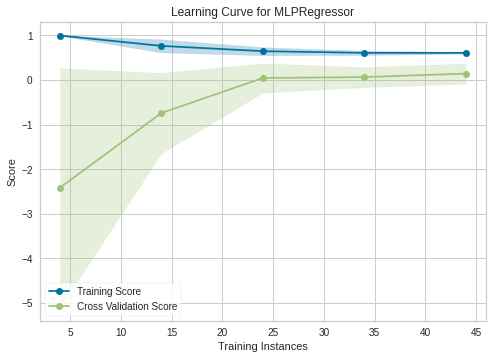

In [23]:
import yellowbrick
from yellowbrick.model_selection import LearningCurve
cv = KFold(n_splits=5, random_state=42, shuffle=True)#
# Create the learning curve visualizer
visualizer = LearningCurve(reg, cv=cv,scoring='r2')

# Fit the visualizer and display the learning curve
visualizer.fit(X_train, y_train)
visualizer.show()

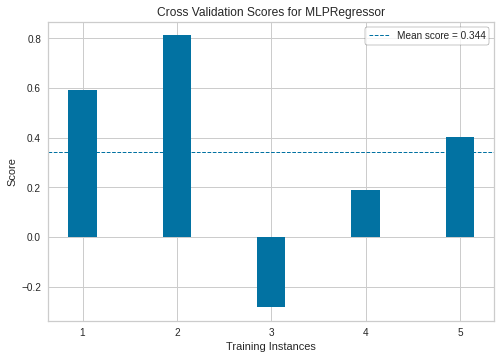

CVScores(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2906340970>,
         cv=KFold(n_splits=5, random_state=0, shuffle=True),
         estimator=MLPRegressor(hidden_layer_sizes=(5, 2),
                                learning_rate_init=0.02, max_iter=500,
                                momentum=0.7, random_state=42, solver='lbfgs'),
         scoring='r2')

In [ ]:

cv = KFold(n_splits=5, random_state=0, shuffle=True)
#validation score for cv=
from yellowbrick.model_selection import cv_scores
cv_scores(
    reg,
    X_train,
    y_train,
    cv=cv,
    n_jobs=-1,
    scoring='r2',
    random_state=42)

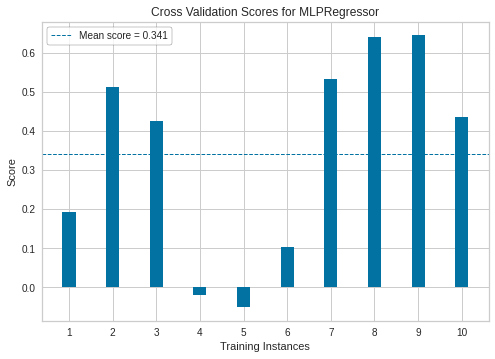

CVScores(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f290365c280>,
         cv=KFold(n_splits=10, random_state=42, shuffle=True),
         estimator=MLPRegressor(hidden_layer_sizes=(5, 2),
                                learning_rate_init=0.02, max_iter=500,
                                momentum=0.7, random_state=42, solver='lbfgs'),
         scoring='r2')

In [ ]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# validation score for cv=10
from yellowbrick.model_selection import cv_scores
cv_scores(
    reg,
    X_train,
    y_train,
    cv=cv,
    n_jobs=-1,
    scoring='r2',
    random_state=0)

5-FOLD CROSS VALIDATION

In [ ]:
#implementing the 5 fold cross validation for r2 score on train set
cv = KFold(n_splits=5, random_state=28, shuffle=True)
#scoring=['neg_mean_squared_error']
scores = cross_val_score(reg, X_train,y_train, scoring='r2', cv=cv)
scores.mean()

0.4652426517957234

In [ ]:
#implementing the 5 fold cross validation for MSE & RMSE on train set
cv = KFold(n_splits=5, random_state=0, shuffle=True)
#scoring=['neg_mean_squared_error']
scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(mean(absolute(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)


the root mean squared erro 0.19454176654266905
the mean squared error 0.03784649892954235


In [ ]:
#model performance for predicted outcomes after 5-fold cross validation
pred = cross_val_predict(reg, X_train, y_train, cv=cv)

R2 = metrics.r2_score(y_train, pred)
MSE=metrics.mean_squared_error(y_train, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.5215884752192148
MSE AFTER CV: 0.03784649892954234
RMSE AFTER CV: 0.19454176654266903


5 FOLD CROSS VALIDATION FOR TEST SET

In [ ]:
#implementing the 5 fold cross validation for r2 score on test set
cv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(reg, X_test,y_test, scoring='r2', cv=cv)
scores.mean()

-1.0148343350994435

In [ ]:
#implementing the 5 fold cross validation for MSE & RMSE on test set
cv = KFold(n_splits=5, random_state=28, shuffle=True)
#scoring=['neg_mean_squared_error']
scores = cross_val_score(reg, X_test, y_test, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(mean(absolute(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.14780428926312894
the mean squared error 0.021846107924578695


In [ ]:
#model performance for predicted outcomes after 5-fold cross validation
pred = cross_val_predict(reg, X_test, y_test, cv=cv)
R2 = metrics.r2_score(y_test, pred)
MSE=metrics.mean_squared_error(y_test, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.1192693541220643
MSE AFTER CV: 0.023365379426711245
RMSE AFTER CV: 0.15285738263725193


TEN FOLD CROSS VALIDATION TRAIN SET

In [ ]:
#implementing the 10 fold cross validation for r2 score on  train set
cv = KFold(n_splits=10, random_state=42, shuffle=True)
#scoring=['neg_mean_squared_error']
scores = cross_val_score(reg, X_train,y_train, scoring='r2', cv=cv)
scores.mean()

0.34124312923124067

In [ ]:
#implementing the 10 fold cross validation for RMSE & MSE on train set
cv = KFold(n_splits=10, random_state=4, shuffle=True)
#scoring=['neg_mean_squared_error']
pred_cv1 = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(pred_cv1)))
MSE=(absolute(mean(pred_cv1)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.18906890627355857
the mean squared error 0.035747051319479674


In [ ]:
pred = cross_val_predict(reg, X_train, y_train, cv=cv)

R2 = metrics.r2_score(y_train, pred)
MSE=metrics.mean_squared_error(y_train, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.5305250133240156
MSE AFTER CV: 0.037139541295166514
RMSE AFTER CV: 0.19271621959546248


TEN FOLD CROSS VALIDATION TEST SET

In [ ]:
#implementing the 10 fold cross validation for r2 score on  train set
cv = KFold(n_splits=10, random_state=42, shuffle=True)
#scoring=['neg_mean_squared_error']
scores = cross_val_score(reg, X_train,y_train, scoring='r2', cv=cv)
scores.mean()

0.34124312923124067

In [ ]:
#implementing the 10 fold cross validation for RMSE & MSE score the model for test set
cv = KFold(n_splits=10, random_state=0, shuffle=True)
#scoring=['neg_mean_squared_error']
scores = cross_val_score(reg, X_test,y_test, scoring='neg_mean_squared_error', cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(absolute(mean(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.15677231025655694
the mean squared error 0.024577557263178153


In [ ]:
pred = cross_val_predict(reg, X_test, y_test, cv=cv)

R2 = metrics.r2_score(y_test, pred)
MSE=metrics.mean_squared_error(y_test, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV -0.06564883299410473
MSE AFTER CV: 0.02827117397932603
RMSE AFTER CV: 0.1681403401308741


LEAVE OUT ONE CROSS VALIDATION TRAIN SET


In [ ]:
#EVALUATING THE MODEL WITH LEAVE ONE OUT On train set
cv=LeaveOneOut()

scores = cross_val_score(reg,X_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(absolute(mean(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.20368901645007875
the mean squared error 0.04148921542240045


In [ ]:
cv=LeaveOneOut()
pred = cross_val_predict(reg, X_train, y_train, cv=cv)

R2 = metrics.r2_score(y_train, pred)
MSE=metrics.mean_squared_error(y_train, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV 0.4755414800946004
MSE AFTER CV: 0.04148921542240045
RMSE AFTER CV: 0.20368901645007875


In [ ]:
cv=LeaveOneOut()
y_pred = cross_val_predict(reg, X_train, y_train, cv=cv)
r2_loocv= r2_score(y_pred,y_train)
print(r2_loocv)

0.12379092719939067


LEAVE OUT ONE CROSS VALIDATION TEST SET

In [ ]:
cv=LeaveOneOut()

scores = cross_val_score(reg,X_test, y_test, scoring='neg_mean_squared_error',
                         cv=cv)
RMSE=sqrt(mean(absolute(scores)))
MSE=(absolute(mean(scores)))
print('the root mean squared erro',RMSE)
print('the mean squared error',MSE)

the root mean squared erro 0.16576577108080487
the mean squared error 0.027478290862013803


In [ ]:
cv=LeaveOneOut()
pred = cross_val_predict(reg, X_test, y_test, cv=cv)

R2 = metrics.r2_score(y_test, pred)
MSE=metrics.mean_squared_error(y_test, pred)
RMSE=sqrt(MSE)
print('r2 after CV',R2)
print ('MSE AFTER CV:', MSE)
print('RMSE AFTER CV:',RMSE)

r2 after CV -0.03576203136066769
MSE AFTER CV: 0.027478290862013803
RMSE AFTER CV: 0.16576577108080487


In [ ]:
cv=LeaveOneOut()
y_pred = cross_val_predict(reg, X_train, y_train, cv=cv)
r2_loocv= r2_score(y_pred,y_train)
print(r2_loocv)

0.12379092719939067


GRID SEARCH CROSS VALIDATION WITH RFE MODEL WITH ALL THREE FEATRURE TO SEE TRAIN AND TEST SCORE FOR CV

In [ ]:
#performing hyperperemeter tuning with grid sreach cross validation
#o=(len(X_train.columns))
folds = KFold(n_splits = 10, shuffle = True, random_state = 0)
hyper_params = [{'n_features_to_select': list(range(3,4))}]
# step-3: perform grid search
model_G =model_CV
lm = model_CV
lm.fit(X_train, y_train)
rfe = RFE(lm) 
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid= hyper_params,
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(X_train, y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

GRID SERACH CV FOR SELECTING BEST OPTIMIZER AND ACTIVATION FUNCTION

In [ ]:
cv=KFold(n_splits=5,shuffle=True,random_state=9)

In [ ]:
#performing Gridsearch for TESTING DIFFERENT OPTIMIZER
# define the grid search parameters
model=reg
param = {
    'solver':['adam','sgd','ibfgs']}
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.16089290052788677
Best Hyperparameters: {'solver': 'sgd'}


In [ ]:
#Grid search for the best activation function
model=reg
param = {
    'activation':['relu','tahn','identity','softmax','logistics']}
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.004222466071692965
Best Hyperparameters: {'activation': 'identity'}


FINAL MODEL


In [24]:
pred = reg.predict(ex_x)
r2 =r2_score(ex_y, pred)
MSE=mean_squared_error(ex_y, pred )
print(r2)
print(MSE)
RMSE=sqrt(MSE)
print(RMSE)
len(pred)

0.45403460432935516
0.03853620267650807
0.19630639998866076


115

In [25]:
print(y_test.shape)

(14, 1)


CORRELATION METRICS FOR TEST AND PREDICTED OUTCOME

In [26]:
corr_1=np.corrcoef(y_test, y_pred)
corr_1

ValueError: ignored

In [ ]:
#COVARIANCE FOR TEST and PREDICTED OUTCOME
Cov=np.cov(y_test, y_pred)
Cov

array([[0.02857027, 0.02300217],
       [0.02300217, 0.02514183]])

PREDICTING WITH THE EXTERNAL DATASET

127

Text(0, 0.5, 'predictions')

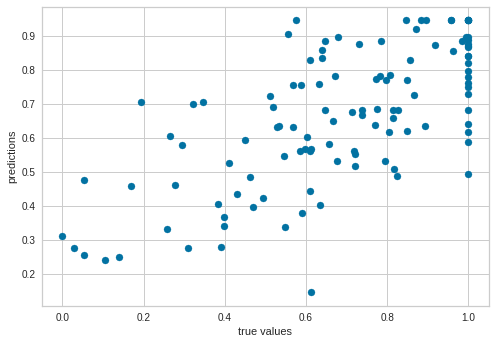

In [ ]:
plt.scatter(ex_y, pred)
plt.xlabel('true values')
plt.ylabel('predictions')

CORRELATION METRICS for EXTERNAL DATA SET

In [ ]:
print(ex_x.shape)
print(ex_y.shape)

(115, 3)
(115, 1)


In [ ]:
ex_y.shape=(115,)#cHANGE SHAPE AND DIMENSION

In [ ]:
#COVARIANCE DATASET
Cov=np.cov(ex_y, pred )
Cov

array([[0.07120275, 0.0366926 ],
       [0.0366926 , 0.04057187]])

In [ ]:
#PEARSON CORRELATION  FOR EXTERNAL DATASET
corr_1=np.corrcoef(ex_y, pred )
corr_1

array([[1.        , 0.68268069],
       [0.68268069, 1.        ]])

In [ ]:
def inverse_transform(y_pred, min_max_values):
  min_value = min_max_values[0]
  max_value = min_max_values[1]
  return (y_pred * (max_value - min_value)) + min_value

In [ ]:
#fUNCTION TO rescale Predicted EC3 values to original value
y_pred=pred
min_max_values=(0,1)
inverse_transformed_value = inverse_transform(y_pred, min_max_values)
inverse_pred=inverse_transformed_value

In [ ]:
#fUNCTION TO rescale orginal prediction EC3 values to original value
y_pred=ex_y
min_max_values=(0,1)
inverse_extransformed_value = inverse_transform(y_pred, min_max_values)
inverse_expred=inverse_extransformed_value

In [ ]:
#Convert to dataframe
iv=pd.DataFrame(inverse_pred)
ip=pd.DataFrame(inverse_expred)

In [ ]:
ANN_MODEL1=CosEu1[['log_DPRA_mean','log_hCLAT_MIT','log_KS.Ima']]
ANN_MODEL1['ANNmodel1_Set']="Test"
ANN_MODEL1=ANN_MODEL1.reset_index()
ANN_MODEL1['test_pred']=iv
ANN_MODEL1['Original_pred']=ip
ANN_MODEL1=ANN_MODEL1.set_index('CASRN')
ANN_MODEL1

,log_DPRA_mean,log_hCLAT_MIT,log_KS.Ima,ANNmodel1_Set,test_pred,Original_pred
CASRN,,,,,,
35691-65-7,1.808211,0.995635,0.605305,Test,0.338620,0.397942
149-30-4,1.687975,2.227887,0.945961,Test,0.633464,0.533533
104-55-2,1.755494,1.447158,1.210586,Test,0.434545,0.429271
137-26-8,1.725912,1.000000,0.829304,Test,0.338022,0.548805
69-72-7,1.089905,3.000000,0.053078,Test,0.873800,0.731119
...,...,...,...,...,...,...
101-39-3,1.292256,2.143015,2.142483,Test,0.601899,0.603646
111-80-8,1.712650,2.282622,1.519303,Test,0.630442,0.528520
93-51-6,0.759668,2.447158,0.008600,Test,0.758299,0.631597


In [ ]:
# Define a function that takes two DataFrame arguments and returns the sum of their values
def my_calculation(df1, df2):
    return (df1 - df2)**2

ANN_MODEL1['Res'] = ANN_MODEL1.apply(lambda row: my_calculation(row['Original_pred'], row['test_pred']), axis=1)
# Print the result
ANN_MODEL1

,log_DPRA_mean,log_hCLAT_MIT,log_KS.Ima,ANNmodel1_Set,test_pred,Original_pred,Res
CASRN,,,,,,,
35691-65-7,1.808211,0.995635,0.605305,Test,0.703335,0.547689,0.024226
149-30-4,1.687975,2.227887,0.945961,Test,0.604774,0.649555,0.002005
104-55-2,1.755494,1.447158,1.210586,Test,0.666074,0.571226,0.008996
137-26-8,1.725912,1.000000,0.829304,Test,0.689189,0.661029,0.000793
69-72-7,1.089905,3.000000,0.053078,Test,0.409879,0.797997,0.150635
...,...,...,...,...,...,...,...
101-39-3,1.292256,2.143015,2.142483,Test,0.518263,0.702229,0.033844
111-80-8,1.712650,2.282622,1.519303,Test,0.602529,0.645789,0.001871
93-51-6,0.759668,2.447158,0.008600,Test,0.372922,0.723228,0.122715


In [ ]:
RES=ANN_MODEL1[ANN_MODEL1['Res'] > 0.5]
len(RES)

9

In [ ]:
#Add predictions to main merged dataset
merge['Ewc_model_pred']=ANN_MODEL1['test_pred']
merge['Ewc_model_pred']=merge['Ewc_model_pred'].replace(np.nan,'Neg')

In [ ]:
merge["EWC_Model1_Potency_Pred"] =np.nan
merge["EWC_Model1_Potency_Pred.3class"] = np.nan
merge['Ewc_model_pred'] = pd.to_numeric(merge['Ewc_model_pred'],errors='coerce')


In [ ]:
# apply the conditions and labels
merge.loc[merge['Ewc_model_pred'] < (-1), "EWC_Model1_Potency_Pred" ] = 'Extreme'
merge.loc[(merge['Ewc_model_pred'] >= (-1)) & (merge['Ewc_model_pred'] < 0), "EWC_Model1_Potency_Pred"] = 'Strong'
merge.loc[(merge['Ewc_model_pred'] >= 0) & (merge['Ewc_model_pred'] < 1), "EWC_Model1_Potency_Pred"] = 'Moderate'
merge.loc[merge['Ewc_model_pred'] >= 1, "EWC_Model1_Potency_Pred"] = 'Weak'
merge.loc[merge['Ewc_model_pred'] >=np.nan, "EWC_Model1_Potency_Pred"] = 'Non'

In [ ]:
# create the new column and set the initial values
merge["EWC_Model1_Potency_Pred.3class"] = merge["EWC_Model1_Potency_Pred"]
# apply the conditions and labels
merge.loc[merge["EWC_Model1_Potency_Pred"] == "Extreme", "EWC_Model1_Potency_Pred.3class"] = "Strong"
merge.loc[merge["EWC_Model1_Potency_Pred"] == "Moderate", "EWC_Model1_Potency_Pred.3class"] = "Weak"

# convert the column to a categorical variable with the specified levels
merge["EWC_Model1_Potency_Pred.3class"] = pd.Categorical(merge["EWC_Model1_Potency_Pred.3class"], categories=["Non", "Weak", "Strong"])

In [ ]:
# create the new column and set the initial values
merge['EWC_Model1_Call'] = pd.NA
# apply the conditions and labels
merge.loc[merge["EWC_Model1_Potency_Pred"].notnull(), 'EWC_Model1_Call'] = 1
merge.loc[merge["EWC_Model1_Potency_Pred"].isnull(), 'EWC_Model1_Call'] = 0

In [ ]:
merge["EWC_Model1_Potency_Pred"].unique()

array(['Moderate', nan], dtype=object)

In [ ]:
merge['EWC_Model1_Call'].unique()

array([1, 0], dtype=object)

In [ ]:
merge[["EWC_Model1_Potency_Pred",'EWC_Model1_Call']].head()

,EWC_Model1_Potency_Pred,EWC_Model1_Call
CASRN,,
35691-65-7,Moderate,1
149-30-4,Moderate,1
104-55-2,Moderate,1
137-26-8,Moderate,1
69-72-7,Moderate,1


In [ ]:
#merge['EWC_Model1_Call'] = pd.factorize(merge['EWC_Model1_Call'])[0]

In [ ]:
merge[['Ewc_model_pred',"EWC_Model1_Potency_Pred"]]

,Ewc_model_pred,EWC_Model1_Potency_Pred
CASRN,,
35691-65-7,0.338620,Moderate
149-30-4,0.633464,Moderate
104-55-2,0.434545,Moderate
137-26-8,0.338022,Moderate
69-72-7,0.873800,Moderate
...,...,...
101-39-3,0.601899,Moderate
111-80-8,0.630442,Moderate
93-51-6,0.758299,Moderate


In [ ]:
merge['EWC_Model1_Potency_Pred.3class']=merge['EWC_Model1_Potency_Pred.3class'].fillna('Non')

In [ ]:
merge['EWC_Model1_Call'].head()

CASRN
35691-65-7    1
149-30-4      1
104-55-2      1
137-26-8      1
69-72-7       1
Name: EWC_Model1_Call, dtype: object

In [ ]:
merge['EWC_Model1_Call'] = merge['EWC_Model1_Call'].astype('int64')

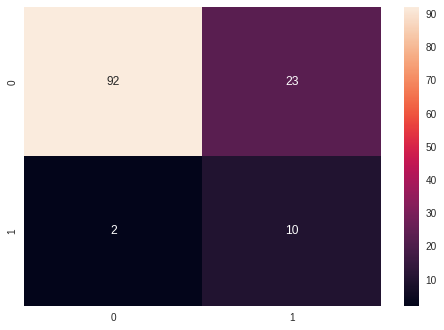

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# create the confusion matrix for LLNA harzard
cm=confusion_matrix(merge['EWC_Model1_Call'], merge['LLNACallMNC'], labels=[1,0])
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')

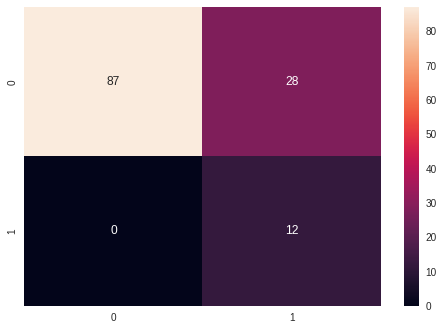

In [ ]:
# Binary Class accuracy usisng human data
hm=confusion_matrix(merge['EWC_Model1_Call'], merge['humanCall'], labels=[1,0])
sns.heatmap(hm, annot=True, fmt='d')

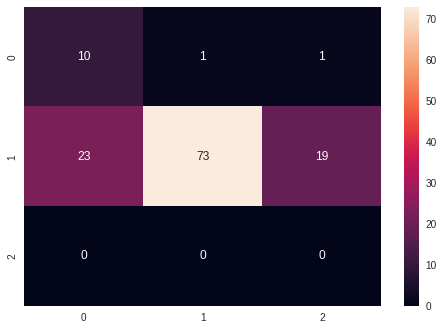

In [ ]:
# convert the columns to categorical variables with the specified levels
merge['LLNApotency3classMNC'] = pd.Categorical(merge['LLNApotency3classMNC'], categories=["Non", "Weak", "Strong"])
merge['EWC_Model1_Potency_Pred.3class'] = pd.Categorical(merge['EWC_Model1_Potency_Pred.3class'], categories=["Non", "Weak", "Strong"])
# create the confusion matrix
llna_3c=confusion_matrix(merge['EWC_Model1_Potency_Pred.3class'], merge['LLNApotency3classMNC'], labels=["Non", "Weak", "Strong"])
sns.heatmap(llna_3c, annot=True, fmt='d')

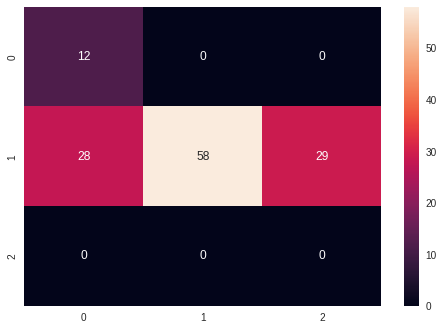

In [ ]:
# create the confusion matrix for 3 class potency and human data 
hu_3c=confusion_matrix(merge['EWC_Model1_Potency_Pred.3class'], merge['humanpotency3class'], labels=["Non", "Weak", "Strong"])
sns.heatmap(hu_3c, annot=True, fmt='d')

In [ ]:
data_to_excel=pd.ExcelWriter('New(Imax)_CosEUdata.xlsx')
CosEu.to_excel(data_to_excel)
data_to_excel.save()

In [27]:
import pickle

In [29]:
#collect the model object file
filename ='EWC_2.pkl' 
pickle.dump(reg,open(filename,'wb'))

In [30]:
model = pickle.load(open(filename,'rb'))
model.predict(X_test)

array([0.79784195, 0.74724789, 0.85407619, 0.90048852, 0.94440321,
       0.80509218, 0.30056083, 0.91948157, 0.85100469, 0.8187002 ,
       0.7931046 , 0.62644152, 0.84089026, 0.80276724])

In [ ]:
!pip install streamlit --quiet
!npm install -g localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 116.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 126.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
/

In [ ]:

import numpy as np
import cloudpickle as cp
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler
import pickle
import pandas as pd
import streamlit as st 
from PIL import Image
#collect the model object file
filename ='EWC_2' 
model = pickle.load(open(filename,'rb'))

def welcome():
    return "Welcome All"
def inverse_transform(y_pred, min_max_values):
  min_value = min_max_values[0]
  max_value = min_max_values[1]
  return (y_pred * (max_value - min_value)) + min_value

def prediction_LOGEC3(log_DPRA_mean, log_hCLAT_MIT,log_KSIma, scaler, model):
    # Scale the input
    scaled_input = scaler.transform([[log_DPRA_mean, log_hCLAT_MIT,log_KSIma]])
    prediction = model.predict(scaled_input)
    return prediction

def main():
    st.title("'EDELWEISS CONNECT ITS SKIN SENSITIZATION SOLUTION'")
    st.markdown('An Artificial Neural Network Regression model Utilizing invitro and inchemo(h-CLAT,DPRA,KSIma) Descriptors for predicting skin Sensitization')
    html_temp = """
    EWC_1 SKIN SENSITIZATION PREDICTION App 
    """
    st.markdown(html_temp, unsafe_allow_html=True)
    log_DPRA_mean = st.number_input("DPRA",min_value=None, max_value=None, value=0.0, step=None)
    log_hCLAT_MIT = st.number_input("hCLAT",min_value=None, max_value=None, value=0.0, step=None)
    log_KSIma=st.number_input("KSIma",min_value=None, max_value=None, value=0.0, step=None)
    
    prediction_type = st.selectbox("Select prediction type:", ["Two-class", "Three-class"])
    if st.button("Predict"):
    # Scale the input
      scaler = MinMaxScaler()
      scaler.fit([[log_DPRA_mean, log_hCLAT_MIT,log_KSIma]])
    # Call the prediction function
      result = prediction_LOGEC3(log_DPRA_mean, log_hCLAT_MIT,log_KSIma, scaler, model)
    # Convert the prediction back to the original scale
      min_max_values=(0,1)
      result = inverse_transform(result,min_max_values)#scaler.inverse_transform(result,min_max_values)
      #result=result.reshape(1,1)
      if result is not None:
        if prediction_type == "Three-class":
            if float(result) < (-1):
                result = 'Strong'
            elif float(result) >= (-1) and float(result) < 0:
                result = 'Strong'
            elif float(result) >= 0 and float(result) < 1:
                result = 'Moderate'
            elif float(result) >= 1:
                result = 'Moderate'
            else:
                result = 'Non'
        else:
            if float(result) < (-1):
                result = 'Positive'
            elif float(result) >= (-1) and float(result) < 0:
                result = 'Positive'
            elif float(result) >= 0 and float(result) < 1:
                result = 'Positive'
            elif float(result) >= 1:
                result = 'Positive'
            else:
                result = 'Negative'
        st.success(f'The chemical Potency is {result}')
    else:
        st.warning("Prediction failed, please check your inputs and try again.")
    
if __name__=='__main__':
    main()
      

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

npx: installed 22 in 1.994s
your url is: https://fluffy-radios-lick-35-230-175-211.loca.lt



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.175.211:8501

